<a href="https://colab.research.google.com/github/vishnu9358862212/Data-visualization-/blob/main/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# 1. Load data
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
# 2. Prepare data
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


,species
81,1
133,2
137,2
75,1
109,2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


,species
73,1
18,0
118,2
78,1
76,1


In [24]:
# 3. Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [25]:
# 4. Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



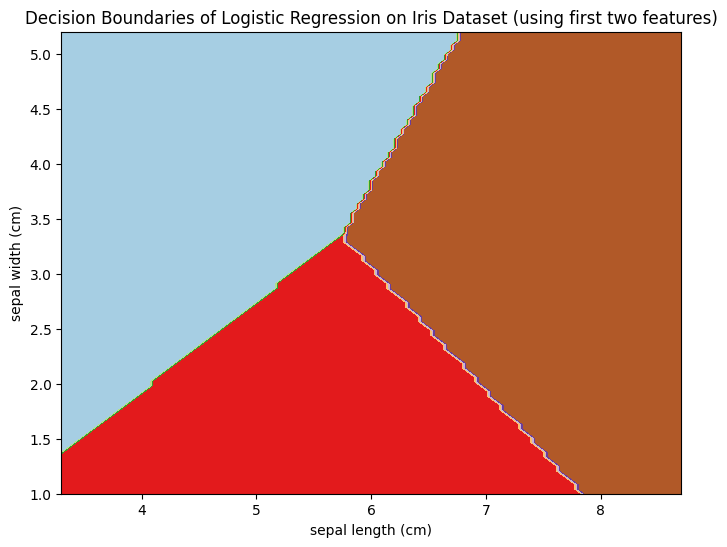

In [26]:
# 5. Visualize decision boundaries (using first two features)
X_train_plot = X_train.iloc[:, :2]
model_2features = LogisticRegression(max_iter=200)
model_2features.fit(X_train_plot, y_train)

fig, ax = plt.subplots(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(
    model_2features, X_train_plot, response_method="predict", cmap=plt.cm.Paired, ax=ax
)
ax.set_title("Decision Boundaries of Logistic Regression on Iris Dataset (using first two features)")
ax.set_xlabel(X_train_plot.columns[0])
ax.set_ylabel(X_train_plot.columns[1])
plt.show()

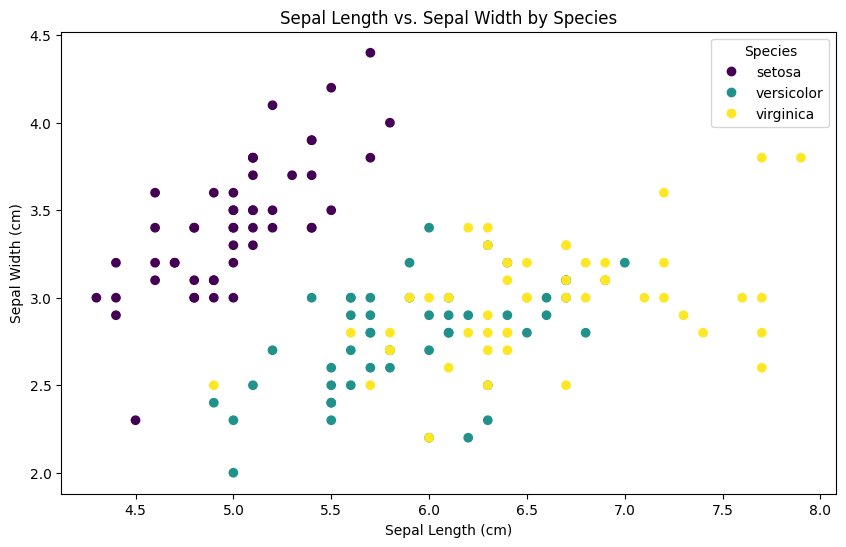

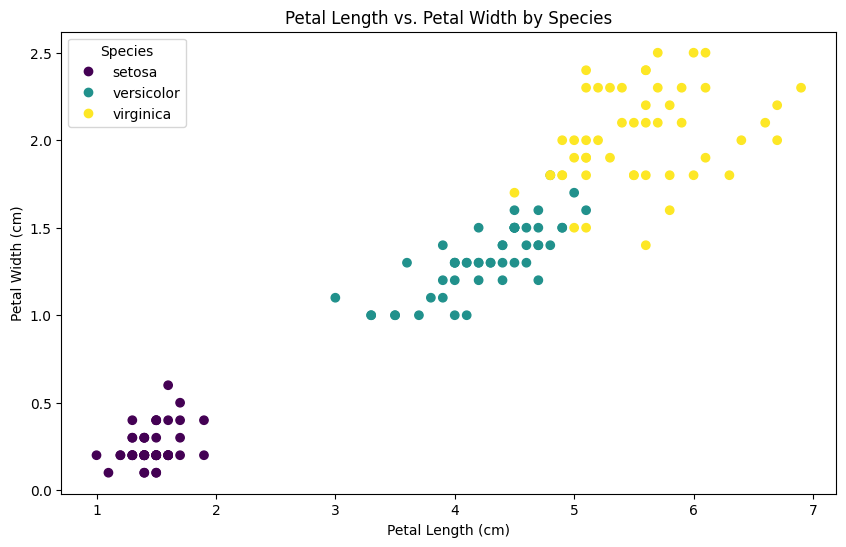

In [27]:
# 6. Perform EDA with scatter plots

# Scatter plot for sepal features
plt.figure(figsize=(10, 6))
scatter_sepal = plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['species'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs. Sepal Width by Species')

# Add legend for sepal plot
legend_labels = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
handles_sepal = [plt.Line2D([], [], marker='o', color=scatter_sepal.cmap(scatter_sepal.norm(species)), linestyle='') for species in legend_labels]
plt.legend(handles_sepal, legend_labels.values(), title='Species')
plt.show()

# Scatter plot for petal features
plt.figure(figsize=(10, 6))
scatter_petal = plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['species'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs. Petal Width by Species')

# Add legend for petal plot
handles_petal = [plt.Line2D([], [], marker='o', color=scatter_petal.cmap(scatter_petal.norm(species)), linestyle='') for species in legend_labels]
plt.legend(handles_petal, legend_labels.values(), title='Species')
plt.show()